In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from termcolor import colored
import glob
from nltk.stem.wordnet import WordNetLemmatizer

import pyLDAvis.gensim
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel, LdaMulticore

import matplotlib.pyplot as plt
%matplotlib inline

import tm_functions

%load_ext autoreload
%autoreload 2
pd.set_option('max_columns', 100)

d:\datascience\python_projects\current_projects\proj_news_viz\topic_model\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
# Фиксирование рандома и прочее
np.random.seed(42)
lemma = WordNetLemmatizer()
ru_stop = stopwords.words('russian')

In [3]:
data = pd.read_csv('data/news_lenta.csv.bz2', encoding='utf-8')

In [4]:
# Извлечение даты из текста ссылки
data['date'] = data['url'].apply(lambda x: pd.to_datetime('-'.join(x.split('/')[4:7])))

In [29]:
data['year_month'] = data['date'].values.astype('datetime64[M]')

In [6]:
%%time
data.loc[:, 'cleaned_text'] = data['text'].apply(lambda x: tm_functions.text_to_words(x, return_tokenized=False, lemmatizer=lemma, stop_words=ru_stop))

Wall time: 6min 34s


In [7]:
%%time
data.loc[:, 'tokenized_text'] = data['text'].apply(lambda x: tm_functions.text_to_words(x, lemmatizer=lemma, stop_words=ru_stop, return_tokenized=True))

Wall time: 6min 24s


In [8]:
%%time
dictionary = corpora.Dictionary(data['tokenized_text'].values)

Wall time: 1min 28s


In [9]:
%%time
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['tokenized_text'].values]

Wall time: 1min 7s


In [12]:
%%time
ldamodel1 = LdaModel(doc_term_matrix, num_topics=17, id2word = dictionary, passes=5, alpha='auto', eta=None, random_state=42)

perplexity = ldamodel1.log_perplexity(doc_term_matrix)
coherence_model_lda = CoherenceModel(model=ldamodel1, texts=data['tokenized_text'].values, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Perplexity: {perplexity}')
print(f'Coherence Score: {coherence_lda}')

Perplexity: -10.006065765812638
Coherence Score: 0.506026505169403
Wall time: 1h 24min 16s


In [81]:
%%time
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(ldamodel1, doc_term_matrix, dictionary, mds='tsne')

Wall time: 4min 45s


In [17]:
#ldamodel1.save('lda.model')

In [5]:
ldamodel1 = LdaModel.load('lda.model')

In [ ]:
grouped_1.index = ['Палестина-Израиль', 'Заявления', 'Взрывы', 'Госдума', 'Милиция, расследования', 'Аварии', 'Госкорпорации',
                   'ООН и международные отношения', 'Непонятно', 'Цены на нефть', 'Партии и выборы', 'Фильмы и кино', 'Футбол',
                   'Самолеты и ракеты', 'Учёные и болезни', 'Зарубежное', 'Музеи и выставки']

In [22]:
pyLDAvis.save_html(panel, 'latest.html')

In [82]:
panel

PreparedData(topic_coordinates=               x          y  topics  cluster      Freq
topic                                                 
4     -47.074619  69.408768       1        1  9.173785
1     -91.012115 -42.108395       2        1  7.926916
6     -55.147091 -13.683084       3        1  7.745806
0       6.018651 -17.104076       4        1  7.348122
7      54.826485 -45.040028       5        1  7.254843
9      45.163887  -3.443689       6        1  7.238032
13    -55.776714 -62.763039       7        1  7.144542
5      13.252056  19.439747       8        1  7.126150
14    -92.345444   0.635623       9        1  5.889778
8     -26.223083 -36.354847      10        1  5.292502
2     -12.832013  48.331337      11        1  5.240558
3     -53.604294  28.055626      12        1  4.155769
16    -92.525375  43.264721      13        1  4.078777
11    -17.572117 -81.765625      14        1  3.987641
12     29.839174  54.675529      15        1  3.800816
10    -23.031376   7.080267      16        1  3.371779
15     10.488297 -54.791531      17        1  3.224186, topic_info=      Category           Freq        Term          Total  loglift  logprob
term                                                                      
277    Default  331979.000000      россии  331979.000000  30.0000  30.0000
184    Default  226114.000000      заявил  226114.000000  29.0000  29.0000
316    Default  197774.000000    долларов  197774.000000  28.0000  28.0000
1173   Default  120217.000000   процентов  120217.000000  27.0000  27.0000
839    Default   89194.000000    процента   89194.000000  26.0000  26.0000
161    Default  240652.000000         сша  240652.000000  25.0000  25.0000
1463   Default  131892.000000    компании  131892.000000  24.0000  24.0000
687    Default  192280.000000         риа  192280.000000  23.0000  23.0000
674    Default  196279.000000     новости  196279.000000  22.0000  22.0000
1070   Default  138729.000000     человек  138729.000000  21.0000  21.0000
178    Default  341533.000000        года  341533.000000  20.0000  20.0000
310    Default  196786.000000        году  196786.000000  19.0000  19.0000
1247   Default   81420.000000      рублей   81420.000000  18.0000  18.0000
67     Default   77352.000000      сказал   77352.000000  17.0000  17.0000
239    Default  259872.000000         это  259872.000000  16.0000  16.0000
199    Default  107432.000000   миллионов  107432.000000  15.0000  15.0000
4624   Default   89973.000000         суд   89973.000000  14.0000  14.0000
1431   Default   96254.000000  результате   96254.000000  13.0000  13.0000
69356  Default   80080.000000    напомним   80080.000000  12.0000  12.0000
228    Default  136712.000000       тысяч  136712.000000  11.0000  11.0000
272    Default  113762.000000  президента  113762.000000  10.0000  10.0000
1955   Default   64393.000000    владимир   64393.000000   9.0000   9.0000
2779   Default   92668.000000      москвы   92668.000000   8.0000   8.0000
1248   Default  109374.000000          рф  109374.000000   7.0000   7.0000
271    Default   91409.000000   президент   91409.000000   6.0000   6.0000
576    Default   96760.000000      страны   96760.000000   5.0000   5.0000
420    Default  135770.000000       около  135770.000000   4.0000   4.0000
1299   Default   38629.000000         нью   38629.000000   3.0000   3.0000
50291  Default   49921.000000         нтв   49921.000000   2.0000   2.0000
514    Default   85521.000000     министр   85521.000000   1.0000   1.0000
...        ...            ...         ...            ...      ...      ...
3224   Topic17    3829.714844    выставке    3856.004883   3.4276  -6.6142
9803   Topic17    5537.019043    памятник    5830.260254   3.3829  -6.2456
18637  Topic17    4574.517578      памяти    4783.023926   3.3899  -6.4365
11880  Topic17    5220.755371      модели    5815.644531   3.3266  -6.3044
8471   Topic17    6747.156738     продажу    9121.474609   3.1330  -6.0479
26095  Topic17    3338.649902       музее    3714.119141   3.3

Для каждого текста извлечём топики и их доли. А потом создадим отдельные столбцы для отображения доли каждого топика.

In [23]:
%%time
data['topics'] = [ldamodel1.get_document_topics(i) for i in doc_term_matrix]

Wall time: 3min 58s


In [24]:
data['topics_dict'] = data['topics'].apply(lambda x: {i[0]: i[1] for i in x})

In [26]:
for i in range(ldamodel1.num_topics):
    data['topic_' + str(i)] = data['topics_dict'].apply(lambda x: x[i] if i in x.keys() else 0)

In [30]:
data = data.sort_values('year_month')

In [33]:
# В пяти строках ошибочная дата (точнее она ошибочна в самой ссылке)
data.loc[data['year_month'] == '1914-09-01 00:00:00', 'year_month'] = pd.Timestamp(year=2014, month=9, day=1, hour=0)

In [35]:
data.to_csv('lenta_processed.csv')

In [3]:
data = pd.read_csv('lenta_processed.csv')

Вот так выглядит изменение доли топиков во времени.

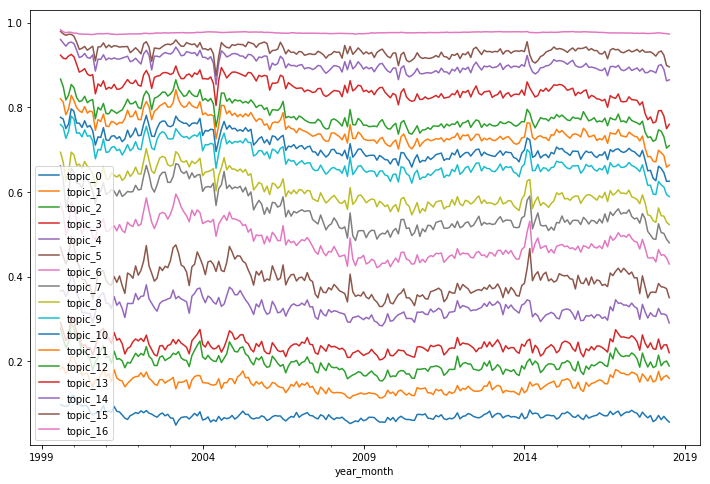

In [40]:
data.groupby(['year_month'])['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16'].mean().plot(stacked=True, figsize=(12, 8))

In [6]:
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [7]:
grouped = data.groupby(['year_month'])['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16'].sum()

In [8]:
grouped_1 = grouped.T.copy()

In [9]:
# for col in grouped_1.columns:
#     grouped_1[col] = grouped_1[col].cumsum()

for col in grouped_1.columns:
    grouped_1[col] = grouped_1[col] / grouped_1[col].sum()

In [10]:
# Темы проставил вручную на основе визуализации pyLDAvis

grouped_1.index = ['Палестина-Израиль', 'Заявления', 'Взрывы', 'Госдума', 'Милиция, расследования', 'Аварии', 'Госкорпорации',
                   'ООН и международные отношения', 'Непонятно', 'Цены на нефть', 'Партии и выборы', 'Фильмы и кино', 'Футбол',
                   'Самолеты и ракеты', 'Учёные и болезни', 'Зарубежное', 'Музеи и выставки']

In [11]:
plotly_data = []
for i, row in grouped_1.iterrows():
    trace = dict(
                x=list(row.index),
                y=row.values,
                mode='lines',
    stackgroup='one',
    name=i)
    plotly_data.append(trace)

In [12]:
layout = go.Layout(
    showlegend=True
)
fig = dict(data=plotly_data, layout=layout)
py.iplot(fig)

In [87]:
data.head()

,tags,text,title,topic,url,date,year_month,cleaned_text,tokenized_text,topics,topics_dict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16
197024,Первая мировая,"Лица, приехавшие в Варшаву из Люблина, передаю...",1914. Под Люблином пойман швабский зверь,Библиотека,https://lenta.ru/news/1914/09/18/zver/,1914-09-18,2014-09-01,лица приехавшие варшаву люблина передают туда ...,"[лица, приехавшие, варшаву, люблина, передают,...","[(0, 0.024306566), (1, 0.038404167), (2, 0.117...","{0: 0.024306566, 1: 0.038404167, 2: 0.11728494...",0.024307,0.038404,0.117285,0.017666,0.067728,0.084085,0.150466,0.140813,0.000000,0.000000,0.054732,0.000000,0.022661,0.00000,0.261949,0.000000,0.000000
197111,Первая мировая,"Министерство народного просвещения, в виду про...",1914. Празднование столетия М.Ю. Лермонтова от...,Библиотека,https://lenta.ru/news/1914/09/16/lermontov/,1914-09-16,2014-09-01,министерство народного просвещения виду происх...,"[министерство, народного, просвещения, виду, п...","[(0, 0.34576237), (1, 0.11359522), (2, 0.01738...","{0: 0.34576237, 1: 0.11359522, 2: 0.017389175,...",0.345762,0.113595,0.017389,0.058696,0.054963,0.030258,0.073231,0.079431,0.000000,0.017601,0.000000,0.000000,0.112882,0.04737,0.020105,0.000000,0.000000
197139,Первая мировая,Фотограф-корреспондент Daily Mirror рассказыва...,1914. Бульдог-гонец под Льежем,Библиотека,https://lenta.ru/news/1914/09/17/bulldogn/,1914-09-17,2014-09-01,фотограф корреспондент рассказывает случай кот...,"[фотограф, корреспондент, рассказывает, случай...","[(0, 0.08614419), (1, 0.03293347), (3, 0.04328...","{0: 0.08614419, 1: 0.03293347, 3: 0.04328213, ...",0.086144,0.032933,0.000000,0.043282,0.058007,0.080425,0.161589,0.056073,0.000000,0.039972,0.039130,0.000000,0.000000,0.00000,0.347156,0.032761,0.000000
197164,Первая мировая,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",1914. Das ist Nesteroff!,Библиотека,https://lenta.ru/news/1914/09/17/nesteroff/,1914-09-17,2014-09-01,штабс капитан п н нестеров днях увидев районе ...,"[штабс, капитан, п, н, нестеров, днях, увидев,...","[(0, 0.02842594), (1, 0.07316689), (2, 0.02409...","{0: 0.02842594, 1: 0.07316689, 2: 0.024091482,...",0.028426,0.073167,0.024091,0.120619,0.031459,0.032221,0.109421,0.030462,0.022808,0.030411,0.054693,0.101231,0.089138,0.00000,0.137134,0.066071,0.040952
197311,Первая мировая,Бои у Сопоцкина и Друскеник закончились отступ...,1914. Русские войска вступили в пределы Венгрии,Библиотека,https://lenta.ru/news/1914/09/16/hungarnn/,1914-09-16,2014-09-01,бои сопоцкина друскеник закончились отступлени...,"[бои, сопоцкина, друскеник, закончились, отсту...","[(0, 0.024321748), (2, 0.15065727), (3, 0.0246...","{0: 0.024321748, 2: 0.15065727, 3: 0.024681296...",0.024322,0.000000,0.150657,0.024681,0.027483,0.111331,0.149239,0.053971,0.025786,0.047877,0.029391,0.087317,0.130263,0.00000,0.030214,0.038122,0.057071


* количество статей, где топик является главным
* второстепенные топики
* связь главных и второстепенных топиков

In [43]:
data['max_topic'] = data['topics_dict'].apply(lambda x: max({int(i.split(': ')[0]) : float(i.split(': ')[1]) for i in x[1:-1].split(', ')}.items(), key=lambda x: x[1])[0])

In [44]:
data['max_topic']

0         14
1          0
2         14
3         14
4          2
5          7
6         14
7          6
8          1
9         13
10         0
11        13
12         9
13         6
14        11
15         6
16         2
17         5
18         1
19         5
20         0
21        12
22         1
23         9
24         0
25         7
26        11
27         2
28         2
29         8
          ..
699747     5
699748    16
699749    16
699750    16
699751     6
699752    16
699753    14
699754     9
699755    16
699756    10
699757     1
699758     1
699759    11
699760    12
699761    14
699762     5
699763     1
699764    16
699765     5
699766    11
699767     5
699768     8
699769    16
699770     1
699771     0
699772    13
699773    16
699774     2
699775    16
699776    10
Name: max_topic, Length: 699777, dtype: int64

In [48]:
for i in range(ldamodel1.num_topics):
    data['topic_max_' + str(i)] = 0
    data.loc[data['max_topic'] == i, 'topic_max_' + str(i)] = 1

In [49]:
grouped = data.groupby(['year_month'])['topic_max_0', 'topic_max_1', 'topic_max_2', 'topic_max_3',
       'topic_max_4', 'topic_max_5', 'topic_max_6', 'topic_max_7',
       'topic_max_8', 'topic_max_9', 'topic_max_10', 'topic_max_11',
       'topic_max_12', 'topic_max_13', 'topic_max_14', 'topic_max_15',
       'topic_max_16'].sum()
grouped

,topic_max_0,topic_max_1,topic_max_2,topic_max_3,topic_max_4,topic_max_5,topic_max_6,topic_max_7,topic_max_8,topic_max_9,topic_max_10,topic_max_11,topic_max_12,topic_max_13,topic_max_14,topic_max_15,topic_max_16
year_month,,,,,,,,,,,,,,,,,
1999-08-01,2,2,1,0,0,2,3,1,0,1,0,1,1,2,1,0,0
1999-09-01,49,50,31,9,60,57,85,53,25,41,0,31,24,53,7,4,1
1999-10-01,57,43,38,9,74,73,71,50,50,86,5,24,15,108,10,8,4
1999-11-01,72,58,41,4,102,101,75,72,50,94,3,38,16,109,9,6,1
1999-12-01,110,72,66,6,108,104,102,74,29,95,1,37,10,76,8,7,0
2000-01-01,101,34,32,5,66,83,89,65,22,64,2,18,18,67,10,4,2
2000-02-01,98,75,58,12,83,86,131,121,36,74,3,51,9,114,16,3,34
2000-03-01,92,83,71,12,95,115,177,171,61,86,3,37,8,122,12,5,76
2000-04-01,102,63,52,10,74,113,160,206,60,72,4,50,23,111,23,10,69


In [50]:
grouped_1 = grouped.T.copy()
for col in grouped_1.columns:
    grouped_1[col] = grouped_1[col] / grouped_1[col].sum()
grouped_1.index = ['Палестина-Израиль', 'Заявления', 'Взрывы', 'Госдума', 'Милиция, расследования', 'Аварии', 'Госкорпорации',
                   'ООН и международные отношения', 'Непонятно', 'Цены на нефть', 'Партии и выборы', 'Фильмы и кино', 'Футбол',
                   'Самолеты и ракеты', 'Учёные и болезни', 'Зарубежное', 'Музеи и выставки']

In [51]:
plotly_data = []
for i, row in grouped_1.iterrows():
    trace = dict(
                x=list(row.index),
                y=row.values,
                mode='lines',
    stackgroup='one',
    name=i)
    plotly_data.append(trace)

In [52]:
layout = go.Layout(
    showlegend=True
)
fig = dict(data=plotly_data, layout=layout)
py.iplot(fig)

In [53]:
data.head()

,Unnamed: 0,tags,text,title,topic,url,date,year_month,cleaned_text,tokenized_text,topics,topics_dict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,max_topic,topic_max_0,topic_max_1,topic_max_2,topic_max_3,topic_max_4,topic_max_5,topic_max_6,topic_max_7,topic_max_8,topic_max_9,topic_max_10,topic_max_11,topic_max_12,topic_max_13,topic_max_14,topic_max_15,topic_max_16
0,197024,Первая мировая,"Лица, приехавшие в Варшаву из Люблина, передаю...",1914. Под Люблином пойман швабский зверь,Библиотека,https://lenta.ru/news/1914/09/18/zver/,1914-09-18,2014-09-01,лица приехавшие варшаву люблина передают туда ...,"['лица', 'приехавшие', 'варшаву', 'люблина', '...","[(0, 0.024306566), (1, 0.038404167), (2, 0.117...","{0: 0.024306566, 1: 0.038404167, 2: 0.11728494...",0.024307,0.038404,0.117285,0.017666,0.067728,0.084085,0.150466,0.140813,0.000000,0.000000,0.054732,0.000000,0.022661,0.00000,0.261949,0.000000,0.000000,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,197111,Первая мировая,"Министерство народного просвещения, в виду про...",1914. Празднование столетия М.Ю. Лермонтова от...,Библиотека,https://lenta.ru/news/1914/09/16/lermontov/,1914-09-16,2014-09-01,министерство народного просвещения виду происх...,"['министерство', 'народного', 'просвещения', '...","[(0, 0.34576237), (1, 0.11359522), (2, 0.01738...","{0: 0.34576237, 1: 0.11359522, 2: 0.017389175,...",0.345762,0.113595,0.017389,0.058696,0.054963,0.030258,0.073231,0.079431,0.000000,0.017601,0.000000,0.000000,0.112882,0.04737,0.020105,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,197139,Первая мировая,Фотограф-корреспондент Daily Mirror рассказыва...,1914. Бульдог-гонец под Льежем,Библиотека,https://lenta.ru/news/1914/09/17/bulldogn/,1914-09-17,2014-09-01,фотограф корреспондент рассказывает случай кот...,"['фотограф', 'корреспондент', 'рассказывает', ...","[(0, 0.08614419), (1, 0.03293347), (3, 0.04328...","{0: 0.08614419, 1: 0.03293347, 3: 0.04328213, ...",0.086144,0.032933,0.000000,0.043282,0.058007,0.080425,0.161589,0.056073,0.000000,0.039972,0.039130,0.000000,0.000000,0.00000,0.347156,0.032761,0.000000,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,197164,Первая мировая,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",1914. Das ist Nesteroff!,Библиотека,https://lenta.ru/news/1914/09/17/nesteroff/,1914-09-17,2014-09-01,штабс капитан п н нестеров днях увидев районе ...,"['штабс', 'капитан', 'п', 'н', 'нестеров', 'дн...","[(0, 0.02842594), (1, 0.07316689), (2, 0.02409...","{0: 0.02842594, 1: 0.07316689, 2: 0.024091482,...",0.028426,0.073167,0.024091,0.120619,0.031459,0.032221,0.109421,0.030462,0.022808,0.030411,0.054693,0.101231,0.089138,0.00000,0.137134,0.066071,0.040952,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,197311,Первая мировая,Бои у Сопоцкина и Друскеник закончились отступ...,1914. Русские войска вступили в пределы Венгрии,Библиотека,https://lenta.ru/news/1914/09/16/hungarnn/,1914-09-16,2014-09-01,бои сопоцкина друскеник закончились отступлени...,"['бои', 'сопоцкина', 'друскеник', 'закончились...","[(0, 0.024321748), (2, 0.15065727), (3, 0.0246...","{0: 0.024321748, 2: 0.15065727, 3: 0.024681296...",0.024322,0.000000,0.150657,0.024681,0.027483,0.111331,0.149239,0.053971,0.025786,0.047877,0.029391,0.087317,0.130263,0.00000,0.030214,0.038122,0.057071,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
id_topic = dict(zip(np.arange(17), ['Палестина-Израиль', 'Заявления', 'Взрывы', 'Госдума', 'Милиция, расследования', 'Аварии', 'Госкорпорации',
                   'ООН и международные отношения', 'Непонятно', 'Цены на нефть', 'Партии и выборы', 'Фильмы и кино', 'Футбол',
                   'Самолеты и ракеты', 'Учёные и болезни', 'Зарубежное', 'Музеи и выставки']))

In [73]:
print('Самый распространённый второстепенный топик для каждого из топиков')
print('Основной - второстепенный')
cols = ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16']
for i in range(ldamodel1.num_topics):
    cols_ = [col for col in cols if col != 'topic_' + str(i)]
    df = data.loc[data['max_topic'] == i, cols_]
    secondary_topic = np.bincount(np.argmax(df.values, axis=1)).argmax() + 1
    #print(f'Вместе с топиком {id_topic[i]} чаще всего встречается {id_topic[secondary_topic
    print(f'{id_topic[i]} - {id_topic[secondary_topic]}')

Самый распространённый второстепенный топик для каждого из топиков
Основной - второстепенный
Палестина-Израиль - Заявления
Заявления - Аварии
Взрывы - Аварии
Госдума - Учёные и болезни
Милиция, расследования - Аварии
Аварии - Взрывы
Госкорпорации - ООН и международные отношения
ООН и международные отношения - ООН и международные отношения
Непонятно - Самолеты и ракеты
Цены на нефть - Аварии
Партии и выборы - Взрывы
Фильмы и кино - Партии и выборы
Футбол - Партии и выборы
Самолеты и ракеты - Цены на нефть
Учёные и болезни - ООН и международные отношения
Зарубежное - Партии и выборы
Музеи и выставки - Фильмы и кино
